In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as sts
import warnings
import plotly.graph_objects as go

In [3]:
warnings.filterwarnings('ignore')

In [4]:
os.chdir("/Users/anino1996/Documents/Netflix/GitLab_files/Project/Project1---Group1")

In [5]:
# IMPORT DATA AND REPLACE * AND ** WITH NaN
df=pd.read_csv("state_M2019_dl.csv",na_values=['*','**'])

In [6]:
df['tot_emp'].head()

0    1,974,170
1       83,760
2        1,320
3       30,790
4        1,110
Name: tot_emp, dtype: object

In [7]:
#FILTER ONLY US STATES
df_states=df[df['area_type']==2]
len(df_states['area_title'].unique())

# FILTER ONLY DETAILED VALUES
df_occupations=df_states[df_states['o_group']=='detailed']


In [8]:
#DEFINE FUNCTION TO REPLACE ALL # VALUES 100 FOR ALL HOURLY RATE COLUMNS AND 208000 FOR ANNUAL SALARY COLUMNS
def rep_vals(data):
    for col in data.columns:
        if col[:2]=='h_':
            data[col].replace('#',100, inplace=True)
        elif col[:2]=='a_':
            data[col].replace('#', 208000, inplace=True)


In [9]:
# REPLACE '#' VALUES WITH AFOREMENTIONED VALUES
rep_vals(df_occupations)

In [10]:
df_new=df_occupations.copy()

In [11]:
# DEFINE FUNCTION TO LOOP THROUGH COLUMNS OF INTEREST 
# Find indices with null values 
# Remove rows and null value indices
# Remove unwanted characters
# Cast cleaned columns as float
def rm_na(df,cols):
    
    for column in cols:
        null_indices=df[df[column].isna()].index
        print(len(null_indices))
        df.drop(index=null_indices,inplace=True)
        df[column]=df.loc[:,column].apply(lambda x:str(x).replace(',',''))
        df[column]=df.loc[:,column].apply(lambda x:str(x).replace(' ',''))
        df[column]=df.loc[:,column].apply(lambda x:str(x).replace('$',''))
        df[column]=df.loc[:,column].astype(float)

In [12]:
# CLEAN ALL COLUMNS OF INTEREST
rm_na(df_occupations,['h_mean','a_mean','h_median','a_median','tot_emp'])

2962
115
0
0
1408


In [13]:
# ENSURE ALL COLUMNS OF INTEREST HAVE NON-NULL VALUES
df_occupations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29696 entries, 2 to 35353
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          29696 non-null  int64  
 1   area_title    29696 non-null  object 
 2   area_type     29696 non-null  int64  
 3   naics         29696 non-null  int64  
 4   naics_title   29696 non-null  object 
 5   i_group       29696 non-null  object 
 6   own_code      29696 non-null  int64  
 7   occ_code      29696 non-null  object 
 8   occ_title     29696 non-null  object 
 9   o_group       29696 non-null  object 
 10  tot_emp       29696 non-null  float64
 11  emp_prse      29696 non-null  float64
 12  jobs_1000     29696 non-null  float64
 13  loc_quotient  29696 non-null  float64
 14  pct_total     0 non-null      float64
 15  h_mean        29696 non-null  float64
 16  a_mean        29696 non-null  float64
 17  mean_prse     29690 non-null  float64
 18  h_pct10       29696 non-nu

In [14]:
# CALCULATE NUMBER OF HOURS WORKED PER WEEK FROM ANNUAL MEAN AND HOURLY MEAN
df_occupations['hr_per_wk']=df_occupations['a_mean']/df_occupations['h_mean']/52
df_occupations.head()

,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,...,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly,hr_per_wk
2,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,...,100,100,"68,630","115,110",180780.0,208000,208000,NaN,NaN,40.000580
3,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,...,70.48,100,"48,240","66,370",98630.0,"146,610",208000,NaN,NaN,40.002455
5,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-2011,Advertising and Promotions Managers,detailed,...,70.46,78.43,"39,160","50,950",114610.0,"146,560","163,140",NaN,NaN,39.996914
6,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,...,73.22,93.68,"56,610","75,830",104630.0,"152,290","194,850",NaN,NaN,39.996840
7,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,...,65.84,89.31,"56,560","71,860",101090.0,"136,950","185,760",NaN,NaN,40.001858


In [15]:
# PRINT OUT MAXIMUM AND MINIMUM HOURS WORKED PER WEEK
print(f'Highest hours worked per week: {df_occupations["hr_per_wk"].max()}')
print(f'Least hours worked per week: {df_occupations["hr_per_wk"].min()}')

Highest hours worked per week: 40.02607561929596
Least hours worked per week: 39.969834087481146


In [16]:
# DEFINE KEYWORDS THAT CAN BE FOUND IN TYPICAL TECH JOBS
keywords = ['engine', 'computer', 'data', 'techni', 'technolog', 'software', 'applica', 'developer', 'scien', 'mathemat', 'database', 'analy']

In [17]:
# CONVERT JOB TITLE COLUMN CHARACTERS TO LOWER CASE
df_occupations['occ_title']=df_occupations['occ_title'].str.lower()

# FILTER CLEANED DATAFRAME TO GET TECH JOBS ONLY
df_tech=df_occupations[df_occupations['occ_title'].str.contains('|'.join(keywords))]
len(df_tech)

5577

In [18]:
# DROP ALL TECH JOBS FROM CLEANED DATAFRAME TO GET NON-TECH JOBS

df_non_tech=df_occupations.drop(index=df_tech.index)
len(df_non_tech)

24119

In [22]:
#DEFINE NEW COLUMN TO INDICATE WHETHER OR NOT A JOB IS A TECH JOB

df_occupations['tech_job']="No"
df_occupations.loc[df_tech.index,'tech_job']='Yes'

In [23]:
# PLOT HISTOGRAM SHOWING PROBABILITY DISTRIBUTION OF TECH AND NON-TECH SALARIES

fig=px.histogram(df_occupations,'a_mean',color='tech_job',nbins=30,barmode='overlay', histnorm='probability')
fig.update_layout(title='Tech and non-tech job mean annual salaries', title_x=0.5, xaxis_title="Mean annual salary", yaxis_title="Probability")


In [24]:
# VISUALIZE TECH AND NON-TECH SALARIES USING A BOXPLOT TO IDENTIFY OUTLIERS

fig_1=px.box(df_occupations,'tech_job', 'a_mean')
fig_1.update_layout(yaxis_title="Annual mean salary",xaxis_title="Tech job or Not", title="Distribution of Tech vs Non-Tech annual mean salaries",title_x=0.5)

In [25]:
# PERFORM AN ONE-WAY ANOVA TEST

sts.f_oneway(df_tech['a_mean'], df_non_tech['a_mean'])

F_onewayResult(statistic=706.5752845776377, pvalue=7.046727211764261e-154)

In [26]:
# GROUP DATAFRAME ACCORDING TO STATE
# FIND THE MEAN ANNUAL AND HOURLY RATES PER STATE

top_states=df_occupations.groupby(['area_title'])
total_hourly_salaries=top_states['h_mean'].mean().sort_values(ascending=False)
total_annual_salaries=top_states['a_mean'].mean().sort_values(ascending=False)

In [27]:
# FIND TOP 10 AND LOWEST 10 STATES BY MEAN ANNUAL SALARY

top_states=total_annual_salaries.head(10).index
lowest_states=total_annual_salaries.tail(10).index

In [28]:
# GROUP DATAFRAME BY STATE AND JOB CATEGORY

state_tech_grp=df_occupations.groupby(["area_title","tech_job"])
mean_annual_salaries=state_tech_grp['a_mean'].mean()

# FIND AND PLOT TOP 10 STATES BY ANNUAL MEAN SALARY 
top_10=mean_annual_salaries.loc[top_states,:].reset_index()

fig_2=px.bar(top_10,'area_title', 'a_mean', color='tech_job', barmode='group')
fig_2.update_layout(xaxis_title='State', yaxis_title="Mean annual salary", title="Top 10 highest paying states", title_x=0.5)

In [29]:
# FIND AND PLOT LEAST 10 STATES BY ANNUAL MEAN SALARY 

low_10=mean_annual_salaries.loc[lowest_states,:].reset_index()

fig_3=px.bar(low_10,'area_title', 'a_mean', color='tech_job', barmode='group')
fig_3.update_layout(xaxis_title='State', yaxis_title="Mean annual salary", title="Top 10 highest paying states", title_x=0.5)

In [30]:
#INVESTIGATE OUTLIERS IN BOXPLOT

#FIND HIGHEST SALARIES IN THE LOWEST PAYING STATES

df_grpd=df_occupations.groupby('area_title')
max_annual=df_grpd['a_mean'].max()
max_annual_low=max_annual.loc[lowest_states].reset_index()
max_annual_low

,area_title,a_mean
0,Indiana,272630.0
1,Tennessee,270180.0
2,Oklahoma,286320.0
3,Alabama,274260.0
4,Idaho,250670.0
5,Kentucky,270580.0
6,South Dakota,285320.0
7,West Virginia,267200.0
8,Arkansas,248380.0
9,Mississippi,276170.0


In [31]:
#FIND HIGHEST PAYING JOBS IN THE HIGHEST PAYING STATES

max_annual_high=max_annual.loc[top_states].reset_index()
max_annual_high
df_occupations.merge(max_annual_high,on=['area_title','a_mean'], how='right').loc[:,['area_title','occ_title','a_mean']]

,area_title,occ_title,a_mean
0,Alaska,"physicians, all other; and ophthalmologists, e...",258550.0
1,California,"surgeons, except ophthalmologists",248100.0
2,Connecticut,obstetricians and gynecologists,259810.0
3,District of Columbia,"surgeons, except ophthalmologists",242640.0
4,Hawaii,"surgeons, except ophthalmologists",250180.0
5,Massachusetts,obstetricians and gynecologists,254780.0
6,New Jersey,"surgeons, except ophthalmologists",279660.0
7,New York,oral and maxillofacial surgeons,230720.0
8,Rhode Island,obstetricians and gynecologists,264550.0
9,Washington,orthodontists,285780.0


In [32]:
# FIND HIGHEST PAYING JOBS IN THE LOWEST PAYING STATES

df_occupations.merge(max_annual_low,on=['area_title','a_mean'], how='right').loc[:,['area_title','occ_title','a_mean']]

,area_title,occ_title,a_mean
0,Alabama,anesthesiologists,274260.0
1,Arkansas,"surgeons, except ophthalmologists",248380.0
2,Idaho,"surgeons, except ophthalmologists",250670.0
3,Indiana,anesthesiologists,272630.0
4,Kentucky,"surgeons, except ophthalmologists",270580.0
5,Mississippi,"surgeons, except ophthalmologists",276170.0
6,Oklahoma,"surgeons, except ophthalmologists",286320.0
7,South Dakota,"surgeons, except ophthalmologists",285320.0
8,Tennessee,"surgeons, except ophthalmologists",270180.0
9,West Virginia,anesthesiologists,267200.0


In [33]:
#VISUALIZE DISTRIBUTION OF WORKING HOURS PER WEEK

px.box(df_occupations,y='hr_per_wk')

In [34]:
# FIND THE HIGHEST PAYING TECH JOBS

tech_outliers=df_tech[df_tech['a_mean']>145150]
high_paying_tech=tech_outliers['occ_title'].unique()
highest_paying_tech=tech_outliers.groupby('occ_title')['a_mean'].mean().sort_values(ascending=False).reset_index()
highest_paying_tech

,occ_title,a_mean
0,computer programmers,164610.000000
1,computer and information systems managers,163032.352941
2,petroleum engineers,161286.000000
3,computer hardware engineers,159130.000000
4,architectural and engineering managers,157551.363636
5,natural sciences managers,156934.444444
6,"geoscientists, except hydrologists and geograp...",154330.000000
7,chemical engineers,150510.000000
8,materials scientists,146540.000000
9,nuclear engineers,146470.000000


In [35]:
# FIND ALL JOBS THAT LIE ABOVE THE UPPER FENCE IN TECH JOBS

non_tech_outliers=df_non_tech[df_non_tech['a_mean']>106840]
high_paying_non_tech=non_tech_outliers['occ_title'].unique()
highest_paying_non_tech=non_tech_outliers.groupby('occ_title')['a_mean'].mean().sort_values(ascending=False).reset_index()
highest_paying_non_tech.head(10)

,occ_title,a_mean
0,"surgeons, except ophthalmologists",247180.238095
1,anesthesiologists,240380.857143
2,obstetricians and gynecologists,237401.818182
3,oral and maxillofacial surgeons,225895.555556
4,orthodontists,225407.727273
5,general internal medicine physicians,219115.121951
6,psychiatrists,218504.250000
7,family medicine physicians,215271.086957
8,"physicians, all other; and ophthalmologists, e...",210598.750000
9,"pediatricians, general",195563.658537


In [36]:
# FIND THE TOTAL EMPLOYMENT SPLIT BETWEEN TECH AND NON-TECH JOBS

grpd=df_occupations.groupby(['tech_job'])
total_employment=grpd['tot_emp'].sum().reset_index().sort_values(by='tot_emp', ascending=False)
fig_4= px.bar(total_employment,'tech_job','tot_emp')
fig_4.update_layout(yaxis_title="Total employment",xaxis_title="Tech job or Not", title="Distribution of Tech vs Non-Tech jobs", title_x=0.5)

In [37]:
# FIND THE TOP AND BOTTOM 10 STATES BY EMPLOYMENT NUMBERS

state_grps=df_occupations.groupby(['area_title'])
t_emp_by_state=state_grps['tot_emp'].sum().sort_values(ascending=False)
top_emp_states=t_emp_by_state.head(10).index
least_emp_states=t_emp_by_state.tail(10).index

In [38]:
# FIND TOTAL EMPLOYMENT OF THE TOP 10 AND LOWEST 10 STATES BY EMPLOYMENT

grpd_employment=df_occupations.groupby(['area_title','tech_job'])
emp_by_state=grpd_employment['tot_emp'].sum()
top_10_emp=emp_by_state.loc[top_emp_states].reset_index()
least_10_emp=emp_by_state.loc[least_emp_states].reset_index()

In [39]:
# MAKE A PIVOT TABLE OF THE VALUES AND PLOT THE TOP 10 STATES BY EMPLOYMENT NUMBERS

top_10_pivot=top_10_emp.pivot_table(values='tot_emp',columns='tech_job', index='area_title').reset_index()
top_10_pivot.rename(columns={"Yes":"Tech Jobs","No":"Non-Tech Jobs"}, inplace=True)
fig_5=px.bar(top_10_pivot,x='area_title',y=["Tech Jobs","Non-Tech Jobs"])
fig_5.update_layout(xaxis_title="State", yaxis_title="Total Employment", title="Top 10 States by Employment", title_x=0.5)

In [313]:
# MAKE A PIVOT TABLE OF THE VALUES AND PLOT THE LOWEST 10 STATES BY EMPLOYMENT NUMBERS

least_10_pivot=least_10_emp.pivot_table(values='tot_emp',columns='tech_job', index='area_title').reset_index()
least_10_pivot.rename(columns={"Yes":"Tech Jobs","No":"Non-Tech Jobs"}, inplace=True)
fig_6=px.bar(least_10_pivot,x='area_title',y=["Tech Jobs","Non-Tech Jobs"])
fig_6.update_layout(xaxis_title="State", yaxis_title="Total Employment", title="10 Lowest States by Employment", title_x=0.5)

In [88]:
# IMPORT DATA ON STATE LONGITUDES AND LATITUDES
state_loc=pd.read_csv("state_locations.csv")

# MERGE LOCATION DATA WITH EMPLOYMENT DATA BY STATE
geo_info=t_emp_by_state.reset_index().merge(state_loc[['area_title','Longitude', 'Latitude']],on='area_title', how='left')

# VISUALIZE MAP DATA
fig=px.scatter_geo(geo_info,lat=geo_info['Latitude'], lon=geo_info["Longitude"], size='tot_emp', hover_name='area_title')
fig.show()

In [191]:
df_survey=pd.read_csv('2019_Data_Professional_Salary_Survey_Responses.csv',skiprows=2, header=1)
df_survey_us=df_survey[df_survey['Country']=='United States']
df_survey_us=df_survey_us[df_survey_us['Survey Year']==2019]
df_survey_us.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
6011,2019,12/6/2018 13:58:02,128500,United States,442,Microsoft SQL Server,15,"Microsoft SQL Server, Oracle",Full time employee,Architect,...,40,"None, or less than 1 day per week",300K-1M (large city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, Projects",1
6013,2019,12/11/2018 6:24:30,110000,United States,43016,Microsoft SQL Server,18,Azure SQL DB,Full time employee,"DBA (Development Focus - tunes queries, indexe...",...,44,"None, or less than 1 day per week",1M+ (metropolis),Private business,No,"Stay with the same employer, same role",Male,DBA (Production Focus - build & troubleshoot s...,"Build scripts & automation tools, Manual tasks...",1
6015,2019,12/11/2018 6:26:28,65000,United States,NaN,Microsoft SQL Server,3,"Microsoft SQL Server, MySQL/MariaDB",Full time employee,Developer: T-SQL,...,45,"None, or less than 1 day per week",100K-299K (city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Manual tasks...",1
6017,2019,12/11/2018 6:30:47,116500,United States,605,Microsoft SQL Server,12,"PostgreSQL, MongoDB, Azure SQL DB",Full time employee of a consulting/contracting...,Architect,...,30,5 or more,1M+ (metropolis),Private business,"Yes, but only passively (just curious)",Prefer not to say,Male,DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",1
6019,2019,12/11/2018 6:33:56,124000,United States,92105,Microsoft SQL Server,18,Oracle,Full time employee,DBA (General - splits time evenly between writ...,...,40,4,1M+ (metropolis),Private business,"Yes, actively looking for something else","Stay with the same role, but change employers",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Projects, R&D",1


In [192]:
#2
education_cnt=df_survey_us.groupby('Education')['Education'].count()
education_cnt

Education
Associates (2 years)           73
Bachelors (4 years)           338
Doctorate/PhD                   3
Masters                        96
None (no degree completed)     92
Name: Education, dtype: int64

<BarContainer object of 5 artists>

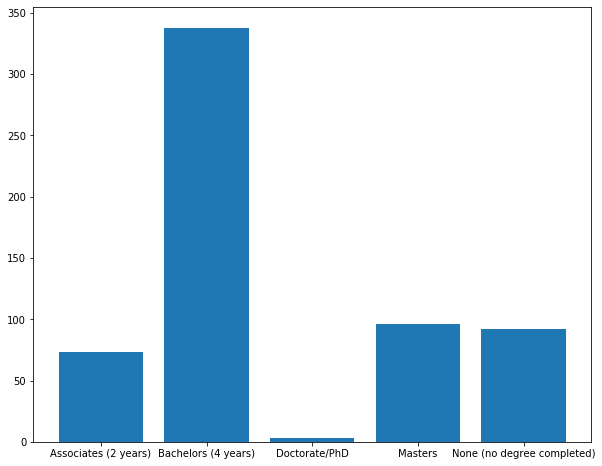

In [193]:
#2
plt.figure(figsize=(10,8))
plt.bar(education_cnt.index, education_cnt.values)


In [194]:
education_levels=df_survey_us['Education'].unique()
education_levels

array(['Bachelors (4 years)', 'None (no degree completed)', 'Masters',
       'Associates (2 years)', 'Doctorate/PhD'], dtype=object)

In [195]:
sal_edu=df_survey_us[['Education', 'SalaryUSD']]
sal_edu

,Education,SalaryUSD
6011,Bachelors (4 years),128500
6013,Bachelors (4 years),110000
6015,None (no degree completed),65000
6017,Masters,116500
6019,Bachelors (4 years),124000
...,...,...
6883,Bachelors (4 years),101500
6884,Bachelors (4 years),107000
6886,Bachelors (4 years),132000
6887,Associates (2 years),58500


In [196]:
sal_edu['SalaryUSD']=sal_edu['SalaryUSD'].apply(lambda x:float(x.replace(',','').replace('$','').replace(' ','')))

/Users/anino1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
sal_edu.groupby('Education')['SalaryUSD'].mean()

Education
Associates (2 years)          103843.013699
Bachelors (4 years)           105115.766272
Doctorate/PhD                 125600.000000
Masters                       117603.666667
None (no degree completed)    107025.195652
Name: SalaryUSD, dtype: float64

In [223]:
sal_edu.groupby('Education')['SalaryUSD'].count()

Education
Associates (2 years)           73
Bachelors (4 years)           338
Doctorate/PhD                   3
Masters                        96
None (no degree completed)     92
Name: SalaryUSD, dtype: int64

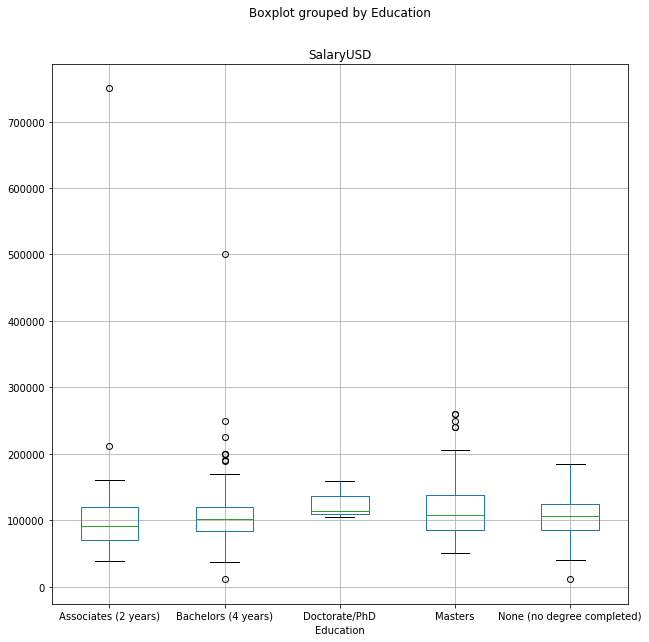

In [198]:
sal_edu.boxplot('SalaryUSD','Education',figsize=(10,10))

In [211]:
data={i:sal_edu[sal_edu['Education']==i]['SalaryUSD'].values for i in education_levels}

In [216]:
education_levels

array(['Bachelors (4 years)', 'None (no degree completed)', 'Masters',
       'Associates (2 years)', 'Doctorate/PhD'], dtype=object)

In [220]:
masters=data['Masters']
Bachelors=data['Bachelors (4 years)']
nodeg=data['None (no degree completed)']
Associates=data['Associates (2 years)']
phd=data['Doctorate/PhD']
deg_vals=[masters, Bachelors, nodeg, Associates, phd]

In [230]:
sts.f_oneway(masters, Bachelors,nodeg, Associates, phd)

F_onewayResult(statistic=0.26394500399083104, pvalue=0.8513799223290898)